In [1]:
# This is an HROCH Base Run on p311b
# Install libraries
%pip install HROCH

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.5/454.5 kB 6.3 MB/s eta 0:00:00


In [2]:
# Call Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from HROCH import SymbolicRegressor
import time
#import math
import sympy as sym

# Molecular Mass Dataset
Here we will take a first look at the molecular mass dataset, taken from [Goossens.](https://pubs.acs.org/doi/full/10.1021/ie950484l?casa_token=-Vy315d8K38AAAAA%3Anxdm5rReXldLbOrBYLfwm0l3MmsCw_Mbnw1vVdNJ308Ki_3lEcnU3bXQmS8TL2nsArNG-AydRFEKVZc)


In [3]:
# Positron
#df=pd.read_csv('./goossens_raw.csv')
#df=pd.read_csv('./c694/goossens_raw.csv')
#Colab
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/goossens_raw.csv')

Mounted at /content/drive


In [4]:
y=df['MW']
X=df[['SG','TBP']]

In [5]:
t0 = time.time()
myMod=SymbolicRegressor(verbose=1)
myMod.fit(X,y)
y_pred=myMod.predict(X)
print("time to fit: ",time.time() - t0, 'seconds')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


time to fit:  5.023283004760742 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


### Results
Let's take a peek at how the predicted molecular mass looks compared to the actual:

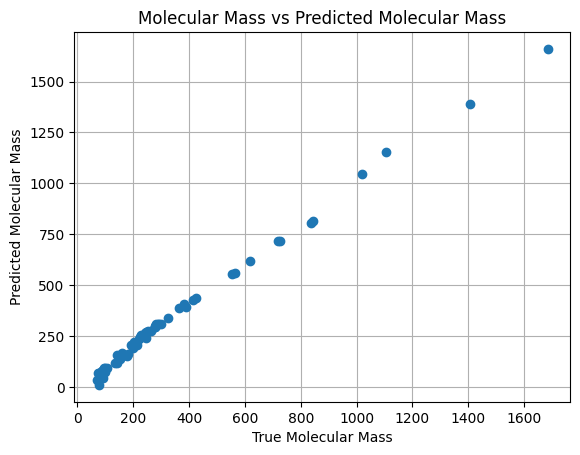

In [6]:
plt.plot(y,y_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

As the correlation looks reasonable, let us take a look at the equation:

In [8]:
def get_eq(X : pd.DataFrame, expr : str):
    model_str = str(sym.parse_expr(expr))
    mapping = {'x'+str(i+1): k for i, k in enumerate(X.columns)}
    new_model = model_str
    for k, v in reversed(mapping.items()):
        new_model = new_model.replace(k, v)

    return new_model

# Create a dummy DataFrame from the x variable for the function call
x_df = pd.DataFrame(X, columns=['x'])
myEq=get_eq(x_df, myMod.sexpr_)
print(myEq)

-390.23304407026445*x0 + x + 2.948071761600545e-5*(2*x - 1246.174213141203)*(2*x - 749.5386845767498)/(x0*(1 - 0.0008024560205585725*x)**2)


This looks dramatically different.  Lets us clean it up a bit:

In [9]:
sym.simplify(myEq)

(x0*(0.0008024560205585725*x - 1)**2*(x - 390.23304407026445*x0) + (5.89614352320109e-5*x - 0.03673811007796359)*(2*x - 749.5386845767498))/(x0*(0.0008024560205585725*x - 1)**2)

In [10]:
# Add Prediction to Dataframe
df['Fit_Mw']=y_pred
# Calculate Correlation Coefficient between columns
df.corr()

,SG,TBP,MW,Fit_Mw
SG,1.000000,0.625218,0.334852,0.341796
TBP,0.625218,1.000000,0.869591,0.883969
MW,0.334852,0.869591,1.000000,0.997975
Fit_Mw,0.341796,0.883969,0.997975,1.000000


In [11]:
# Import Hosseinifar Dataset

# Colab Version
#drive.mount('/content/drive')
dfh=pd.read_csv('/content/drive/MyDrive/hosseinifar_raw.csv')
# Positron Version
#dfh=pd.read_csv('./hosseinifar_raw.csv')
# RStudio Version
# dfh=pd.read_csv('./c694/goossens_raw.csv')

In [12]:
# Predict Hosseinifar
yh=dfh['MW']
xh=dfh[['SG','TBP']]
y_hoss=myMod.predict(xh)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [13]:
# New Correlation Table
dfh['Fit_Mw']=y_hoss
dfh.corr()

,SG,TBP,MW,Fit_Mw
SG,1.000000,0.985561,0.954145,0.962420
TBP,0.985561,1.000000,0.990235,0.994288
MW,0.954145,0.990235,1.000000,0.999295
Fit_Mw,0.962420,0.994288,0.999295,1.000000
